In [1]:
# Required packages
using Plots, DelayDiffEq, Dierckx, CSV, Interpolations, QuadGK, Statistics, Dates, DataFrames, RecursiveArrayTools, TimeSeries

In [2]:
# call the functions chikungunya() and seeding_error() from the files ChikungunyaFunSR1_Pi.jl and ErrorFun_antibes_pi.jl
include("ChikungunyaFunSR.jl")
include("ErrorFun_bergerac_plus.jl")

seeding_error (generic function with 1 method)

In [3]:
# compute errros
# compared range from "2025-05-01" to "2025-06-30"
seeding_start = Date("2025-05-01", "yyyy-mm-dd")
seeding_end = Date("2025-06-30", "yyyy-mm-dd")
error = seeding_error(seeding_start, seeding_end)

61×3 TimeArray{Float64, 2, Date, Matrix{Float64}} 2025-05-01 to 2025-06-30
┌────────────┬─────────┬──────┬───────┐
│            │ RMSE    │ MWIn │ Total │
├────────────┼─────────┼──────┼───────┤
│ 2025-05-01 │ 3.22858 │  0.9 │   5.6 │
│ 2025-05-02 │ 3.24604 │  0.7 │   4.5 │
│ 2025-05-03 │ 3.25565 │  0.6 │   3.9 │
│ 2025-05-04 │ 3.27214 │  0.5 │   2.8 │
│ 2025-05-05 │ 3.27612 │  0.4 │   2.6 │
│ 2025-05-06 │ 3.27212 │  0.5 │   2.8 │
│ 2025-05-07 │ 3.26587 │  0.5 │   3.2 │
│ 2025-05-08 │ 3.26242 │  0.6 │   3.4 │
│     ⋮      │    ⋮    │  ⋮   │   ⋮   │
│ 2025-06-24 │ 2.07704 │ 17.3 │ 104.5 │
│ 2025-06-25 │ 2.06562 │ 17.4 │ 104.9 │
│ 2025-06-26 │ 2.08486 │ 16.7 │ 100.3 │
│ 2025-06-27 │  2.0973 │ 16.3 │  97.8 │
│ 2025-06-28 │ 2.12156 │ 15.6 │  94.0 │
│ 2025-06-29 │ 2.19401 │ 14.1 │  85.0 │
│ 2025-06-30 │  2.3937 │ 11.9 │  71.3 │
└────────────┴─────────┴──────┴───────┘
                        46 rows omitted

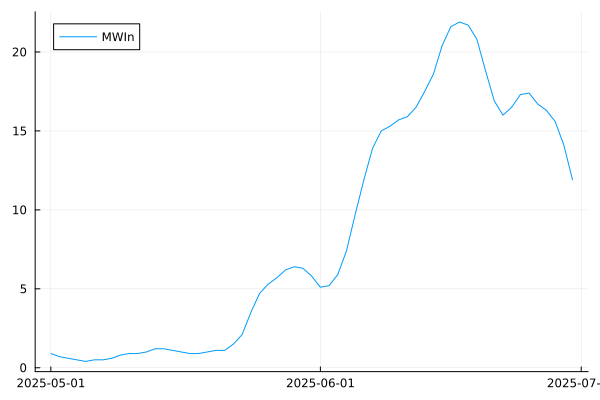

In [5]:
# plotting errors
plot(error["MWIn"])

In [6]:
# save error to csv file (remove # from the code to save it)
CSV.write("error_vs_impact.csv", error)

"error_vs_impact.csv"

In [5]:
# Find the best dates by daily cases
R2_opt    = findwhen(error["R2"] .== values(maximum(error["R2"])))
RMSE_opt  = findwhen(error["RMSE"] .== values(minimum(error["RMSE"])))
NSE_opt   = findwhen(error["NSE"] .== values(maximum(error["NSE"])))
KGE_opt   = findwhen(error["KGE12"] .== values(maximum(error["KGE12"])))
(R2_opt, RMSE_opt, NSE_opt, KGE_opt)

([Date("2025-06-27")], [Date("2025-06-16")], [Date("2025-06-16")], [Date("2025-06-19")])

In [9]:
# Simulation
start_date_str = "18.11.2021"#"18.11.2005"
seed_date_str = string(Dates.format(Date(2025, 06, 17), "dd.mm.yyyy"))
sol12 = chikungunya(44.87, 0.49, start_date_str, "30.12.2025", seed_date_str);

In [4]:
# city data
timestamps = [Date("2025-06-29", "yyyy-mm-dd"), Date("2025-07-06", "yyyy-mm-dd"), Date("2025-07-13", "yyyy-mm-dd"),
              Date("2025-07-20", "yyyy-mm-dd"), Date("2025-07-27", "yyyy-mm-dd"), Date("2025-08-03", "yyyy-mm-dd"),
              Date("2025-08-10", "yyyy-mm-dd"), Date("2025-08-17", "yyyy-mm-dd"), Date("2025-08-24", "yyyy-mm-dd"),
              Date("2025-08-31", "yyyy-mm-dd"), Date("2025-09-07", "yyyy-mm-dd"), Date("2025-09-14", "yyyy-mm-dd"),
              Date("2025-09-21", "yyyy-mm-dd"), Date("2025-09-28", "yyyy-mm-dd"), Date("2025-10-05", "yyyy-mm-dd")]
data = [1, 0, 1, 0, 1, 7, 5, 19, 15, 20, 13, 7, 5, 5, 1]
weekly_ts = TimeArray(timestamps, data, ["cases"])

15×1 TimeArray{Int64, 1, Date, Vector{Int64}} 2025-06-29 to 2025-10-05
┌────────────┬───────┐
│            │ cases │
├────────────┼───────┤
│ 2025-06-29 │     1 │
│ 2025-07-06 │     0 │
│ 2025-07-13 │     1 │
│ 2025-07-20 │     0 │
│ 2025-07-27 │     1 │
│ 2025-08-03 │     7 │
│ 2025-08-10 │     5 │
│ 2025-08-17 │    19 │
│ 2025-08-24 │    15 │
│ 2025-08-31 │    20 │
│ 2025-09-07 │    13 │
│ 2025-09-14 │     7 │
│ 2025-09-21 │     5 │
│ 2025-09-28 │     5 │
│ 2025-10-05 │     1 │
└────────────┴───────┘

In [9]:
weekly_ts_df = DataFrame(weekly_ts)
CSV.write("output/bergerac_weekly_data.csv", weekly_ts_df)

"output/bergerac_weekly_data.csv"

In [10]:
# Get weekly cases
# crop the solution
sol1_crop = to(from(sol12, Date(2025, 06, 16)), Date(2025, 10, 26))
sol1_crop_week = collapse(sol1_crop, week, last)
weekly_city = diff(sol1_crop_week["i_inst"] .+ sol1_crop_week["Hr"])
weekly_city_crop = to(from(weekly_city, Date(2025, 06, 29)), Date(2025, 10, 19))

17×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2025-06-29 to 2025-10-19
┌────────────┬───────────┐
│            │ i_inst_Hr │
├────────────┼───────────┤
│ 2025-06-29 │  0.455051 │
│ 2025-07-06 │   1.17765 │
│ 2025-07-13 │   1.28715 │
│ 2025-07-20 │   2.61127 │
│ 2025-07-27 │   2.73442 │
│ 2025-08-03 │   2.83289 │
│ 2025-08-10 │   4.87317 │
│ 2025-08-17 │   13.1483 │
│ 2025-08-24 │   16.4242 │
│ 2025-08-31 │   21.9302 │
│ 2025-09-07 │    12.528 │
│ 2025-09-14 │   17.2558 │
│ 2025-09-21 │   11.2694 │
│ 2025-09-28 │    13.088 │
│ 2025-10-05 │   2.66067 │
│ 2025-10-12 │   3.21624 │
│ 2025-10-19 │   3.98129 │
└────────────┴───────────┘

In [9]:
weekly_sim_df = DataFrame(weekly_city_crop)
CSV.write("output/bergerac_16June.csv", weekly_sim_df)

"output/bergerac_16June.csv"

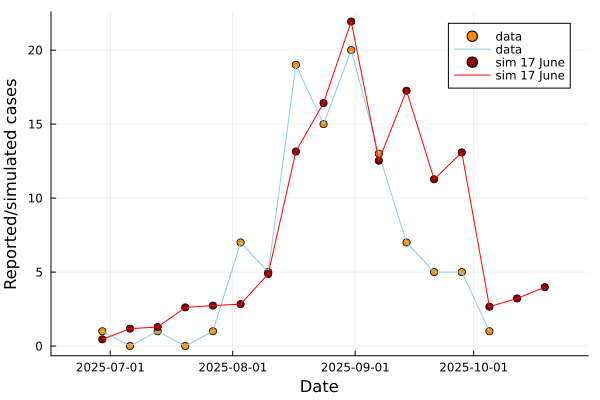

In [6]:
# Plot with xticks explicitly set
scatter(weekly_ts["cases"],
    xlims=(Date("2025-06-16"), Date("2025-10-30")),
    label="data", xlabel="Date", ylabel="Reported/simulated cases",
    color=:darkorange, markersize=4)
plot!(weekly_ts["cases"], 
    xlims=(Date("2025-06-16"), Date("2025-10-30")),
    label="data", xlabel="Date", ylabel="Reported/simulated cases",
    lc=:skyblue, lw=1)
scatter!(weekly_city_crop["i_inst_Hr"],
    xlims=(Date("2025-06-16"), Date("2025-10-30")),
    label="sim 17 June", xlabel="Date", ylabel="Reported/simulated cases",
    color=:darkred, markersize=4)
plot!(weekly_city_crop["i_inst_Hr"],
     xlims=(Date("2025-06-16"), Date("2025-10-30")),
     label="sim 17 June", xlabel="Date", ylabel="Reported/simulated cases",
     lc=:red, lw=1)

In [13]:
savefig("output/bergerac_compare_17Jun.pdf") 

"/users/hails/santeg/sandeep/projects/chikungunya_2025/Bergerac/bergerac_final_code/infection/weekly/output/bergerac_compare_17Jun.pdf"